<a href="https://colab.research.google.com/github/MuayThaiLegz/TutoringLessons/blob/main/assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC-670 Foundations of Machine Learning
## Assignment 4
### Name: (Chidera Ndubuisi)

## Student Learning Objectives

- Understand the evaluation metrics employed for assessing prediction performance in classification systems.
- Develop custom functions for calculating these metrics and compare them to Scikit-Learn's results.
- Students should be able to proficiently reuse functions to obtain variables to create a ROC curve.

## CodeGrade
This assignment will be automatically graded through CodeGrade, and you will have unlimited submission attempts. To ensure successful grading, please follow these instructions carefully: Name your notebook as `assignment_4.ipynb` before submission, as CodeGrade requires this specific filename for grading purposes. Additionally, make sure there are no errors in your notebook, as CodeGrade will not be able to grade it if errors are present. Before submitting, we highly recommend restarting your kernel and running all cells again to ensure that there will be no errors when CodeGrade runs your script.

## Assignment Overview
The purpose of this assignment is to familiarize you with the metrics used to measure prediction performance in classification systems.  You will be tasked with developing custom Python functions to compute these metrics and subsequently, comparing the outcomes with Scikit-Learn's pre-existing implementations.  Creating these custom functions will allow you to better understand the metrics and how they are computed.

### Data
The data for this assignment comes from two separate files:
- `true_labels.csv` : these are the `y_test` labels from the census income dataset in the previous assignment
- `predicted_proba.csv` : these are the predicted probabilities ([predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in sklearn) of our final predictions in the previous assignment

### Assignment Instructions
Walk through the assignment and create the custom functions as requested.  It is very important that all written functions have the function parameters in the same order as given to you in the respective instructions.  

Do not use the built-in Scikit-Learn functions when creating your functions from scratch.  Instead, you may use those functions after to verify your calculations.  Your assignments will be checked and points will be manually taken off if you use Scikit-Learn functions in your created functions.

<u style="color:red;">**Important: Do not round any of your outputs unless directed to do so or CodeGrade will count them as incorrect**</u>

Once you have completed all the tasks, you are ready to submit your assignment to CodeGrade for testing. Please restart your notebook's kernel and run your code from the beginning to ensure there are no error messages. Once you have verified that the code runs without any issues, submit your .ipynb notebook file to CodeGrade for evaluation. Your notebook should be called `assignment_4.ipynb`. You have unlimited attempts for this assignment.

## Standard Imports<a name="import"></a>
Run the code block below to import your standard imports and setup the notebook for CodeGrade grading.

In [ ]:
# standard imports
import pandas as pd
import numpy as np

# imports
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Do not change this option; This allows the CodeGrade auto grading to function correctly
pd.set_option('display.max_columns', 20)

## Get the Data
Execute the following code snippet to import the data required for this assignment. Ensure that the CSV files are located in the same directory as your notebook.  We will import these as Python lists since students might find it more convenient to work with lists when creating their functions from scratch.

In [ ]:
# import the true lables
true_labels = pd.read_csv('true_labels.csv')

# import the predicted probabilities as a list
probs = pd.read_csv('predicted_proba.csv').values.flatten().tolist()

# turn the true labels into an array of 0s and 1s
# check Scikit-Learn's documentation for information on LabelEncoder()
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
true_labels = le.fit_transform(true_labels.values.ravel()).tolist()

# Calculate Model Predictions

Begin by writing a function from scratch called `predict()` that accepts as input the following (in this exact order):
- a list of prediction probabilities (as a list)
- threshold value (as a float)

This function should compute the final predictions to be output by the model and return them as a list.  If a prediction probability value is less than the threshold value, then the prediction is the negative case (i.e. 0).  If a prediction probability value is greater than or equal to the threshold value, then the prediction is the positive case (i.e. 1).

In [ ]:
### ENTER CODE HERE ###

In [ ]:
def predict(prediction_probabilities, threshold):
    predictions = [1 if prob >= threshold else 0 for prob in prediction_probabilities]
    return predictions

Next, we will create a variable called `thresh` that has the value 0.5 which is the threshold value that we will use to make our predictions.  Then invoke the `predict()` function to calculate the model predictions using the `probs` list that you imported earlier and the `thresh` variable.  Save this output as `preds`.

In [ ]:
# threshold value
thresh = 0.5

# prediction values
preds = predict(probs, thresh)

print("Model Predictions: ", preds)

Model Predictions:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0

# Calculate the Model Accuracy

Write a function from scratch called `acc_score()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should calculate the model accuracy score using the true labels as compared to the predictions.  

In [ ]:

def acc_score(true_labels, predictions):

    # Counting the number of correct predictions
    correct_predictions = sum(t == p for t, p in zip(true_labels, predictions))

    # Calculating the accuracy score
    accuracy = correct_predictions / len(true_labels)

    return accuracy

Now, compute the accuracy score using your function `acc_score`, and pass as input the true labels (`true_labels` imported earlier) and the model predictions you calculated above (`preds`).  Save this as the variable `accuracy`.  

In [ ]:
accuracy = acc_score(true_labels, preds)

print("Model Accuracy: ", accuracy)

Model Accuracy:  0.8466144633809305


**Code Check:** Use the Scikit-Learn's [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to check that the value you computed using `acc_score()` is correct.

In [ ]:
### ENTER CODE HERE ###

# Calculate the Model Error Rate

Write a function from scratch called `error_rate()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should calculate the model error rate and should use your `acc_score()` function that you previously defined.

In [ ]:
### ENTER CODE HERE ###

def error_rate(true_labels, predictions):

    # Calculating the accuracy score using the previously defined function
    accuracy = acc_score(true_labels, predictions)

    # Error rate is 1 minus the accuracy score
    return 1 - accuracy

# Calculating the error rate using the same example true labels and predictions
error_rate_value = error_rate(true_labels, preds)

error_rate_value

0.1533855366190695

Now, compute the model error rate for the true labels and the model predictions previously given.  Save this as the variable `error`.

In [ ]:
error = error_rate(true_labels, preds)

print("Model Error Rate: ", error)

Model Error Rate:  0.1533855366190695


# Calculate the Model Precision and Recall

Write a function from scratch called `prec_recall_score()` that accepts as input (in this exact order):
- a list of true labels
- a list of model predictions

This function should compute and return _both_ the model precision and recall (in that order).  

Do not use the built-in Scikit-Learn functions `precision_score()`,`recall_score()`, `confusion_matrix()`, or Panda's `crosstab()` to do this.  Instead, you may use those functions after to verify your calculations. We want to ensure that you understand what is going on behind-the-scenes of the precision and recall functions by creating similar ones from scratch.  

In [ ]:
def prec_recall_score(true_labels, predictions):
    # Initialize variables for true positives, false positives, and false negatives
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # Iterating over the true labels and predictions to calculate counts
    for true, pred in zip(true_labels, predictions):
        if pred:  # If the prediction is positive
            if true:
                true_positives += 1  # True positive
            else:
                false_positives += 1  # False positive
        elif true:
            false_negatives += 1  # False negative

    # Calculating precision and recall
    # Precision: True Positives / (True Positives + False Positives)
    # Recall: True Positives / (True Positives + False Negatives)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return precision, recall

Use your `prec_recall_score` function to compute `precision` and `recall` for the true labels (`true_labels`) and the model predictions (`preds`) you calculated previously.  Save your output as `precision` and `recall` respectively.

In [ ]:
precision, recall = prec_recall_score(true_labels, preds)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.7162379421221865
Recall =  0.5797007156798959


**Code Check:** Use Scikit-Learn's `precision_score()` and `recall_score()` to verify that your calculations above are correct:

In [ ]:
# Sklearn Precision Score
### ENTER CODE HERE ###

In [ ]:
# Sklearn Recall Score
### ENTER CODE HERE ###

# Calculate $F_\beta$ Scores

Write a function from scratch called `f_beta` that computes the $F_\beta$ measure for any value of $\beta$.  

- This function must invoke the `prec_recall_score` function you wrote above in order to obtain the values for precision and recall.  
- The function must take as input (in this exact order):
    - a list of true labels
    - a list of model predictions you calculated previously
    - the value of $\beta$ you wish to use in the calculation
    
We defined $F_\beta$ in class to be:

$$ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

In [ ]:
### ENTER CODE HERE ###

def f_beta(true_labels, predictions, beta):

    # Obtaining precision and recall from the prec_recall_score function
    precision, recall = prec_recall_score(true_labels, predictions)

    # Calculating the F-beta score using the formula
    # Fβ = (1 + β^2) * (precision * recall) / (β^2 * precision + recall)
    if (beta**2 * precision + recall) != 0:
        f_beta_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    else:
        f_beta_score = 0

    return f_beta_score

# Example usage of the function with beta = 1 (which would make it F1 score)
f_beta_score = f_beta(true_labels, preds, 1)

Now, use your `f_beta` function to compute the $F_1$ score for the true labels and the model predictions you calculated previously.  Save your output as `F1`.

In [ ]:
F1 =  f_beta(true_labels, preds, 1)

print("F1 = ", F1)

F1 =  0.6407766990291262


**Code Check:** Verify your above calculation is correct by invoking Scikit-Learn's `f1_score` function.

In [ ]:
### ENTER CODE HERE ###

# Calculate the TPR and FPR for ROC Curve

In the subsequent cells, you will be asked to plot an ROC curve.  The ROC curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).  Both of these are scalar values, akin to precision and recall.

Write a function from scratch called `TPR_FPR_score` that is nearly identical to `prec_recall_score` that you wrote previously, which computes and returns TPR and FPR (in that order).  The function must take as input (in this exact order):
- a list of true labels
- a list of model predictions you calculated previously

TPR and FPR are defined as follows:

$$ TPR = recall = \frac{TP}{TP + FN} $$

$$ FPR = \frac{FP}{FP + TN} $$

In [ ]:
### ENTER CODE HERE ###
def TPR_FPR_score(true_labels, predictions):
    # Initialize variables for true positives, false positives, false negatives, and true negatives
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0

    # Iterating over the true labels and predictions to calculate counts
    for true, pred in zip(true_labels, predictions):
        if pred:  # If the prediction is positive
            if true:
                true_positives += 1  # True positive
            else:
                false_positives += 1  # False positive
        else:
            if true:
                false_negatives += 1  # False negative
            else:
                true_negatives += 1  # True negative

    # Calculating TPR and FPR
    # TPR (True Positive Rate): True Positives / (True Positives + False Negatives)
    # FPR (False Positive Rate): False Positives / (False Positives + True Negatives)
    TPR = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    FPR = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

    return TPR, FPR



**Code Check:** Invoke the `TPR_FPR_score` function using your `labels` and `preds` from previous steps.  Your output should be the following:  `(0.5797007156798959, 0.07094051446945338)`

In [ ]:
### ENTER CODE HERE ###
# Calculating TPR and FPR using the same example true labels and predictions
TPR, FPR = TPR_FPR_score(true_labels, preds)

TPR, FPR


(0.5797007156798959, 0.07094051446945338)

# Compute and Plot the ROC Curve

Write a function from scratch called `roc_curve_computer` that accepts (in this exact order):
- a list of true labels
- a list of prediction probabilities (notice these are probabilities and not predictions - you will need to obtain the predictions from these probabilities using one of your previously created functions)
- a list of threshold values.  

The function must compute and return the True Positive Rate (TPR, also called recall) and the False Positive Rate (FPR) *for each* threshold value in the threshold value list that is passed to the function.

**Important:** Be sure to reuse functions and code segments from your work above! You should reuse two of your above created functions so that you do not duplicate your code.  

The function you will write behaves identically to Scikit-Learn's [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function, except that it will take the list of thresholds in as input rather than return them as output.  Your function must calculate one value of TPR and one value of FPR for each of the threshold values in the list.  

Your function will output a list of TPR values and a list of FPR values (in that order).  You will then take these TPR and FPR values, and plot them against each other to create the [Receiver Operating Characteristic (ROC) curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).

You must not use any built-in library function to perform the calculation of a performance metric.  You may of course use common, built-in Python functions, such as: `range()`, `len()`, et cetera.

In [3]:

def TPR_FPR_score(true_labels, predictions):
    # Initialize variables for true positives, false positives, false negatives, and true negatives
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0

    # Iterating over the true labels and predictions to calculate counts
    for true, pred in zip(true_labels, predictions):
        if pred:  # If the prediction is positive
            if true:
                true_positives += 1  # True positive
            else:
                false_positives += 1  # False positive
        else:
            if true:
                false_negatives += 1  # False negative
            else:
                true_negatives += 1  # True negative

    # Calculating TPR and FPR
    # TPR (True Positive Rate): True Positives / (True Positives + False Negatives)
    # FPR (False Positive Rate): False Positives / (False Positives + True Negatives)
    TPR = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    FPR = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

    return TPR, FPR


def predict(prediction_probabilities, threshold):
    predictions = [1 if prob >= threshold else 0 for prob in prediction_probabilities]
    return predictions
def roc_curve_computer(true_labels, prediction_probs, thresholds):
    tpr_values = []
    fpr_values = []

    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the current threshold

        predictions =  predict(prediction_probs, threshold)

        # Calculate TPR and FPR using the TPR_FPR_score function
        TPR, FPR = TPR_FPR_score(true_labels, predictions)

        # Append the TPR and FPR to their respective lists
        tpr_values.append(TPR)
        fpr_values.append(FPR)

    return tpr_values, fpr_values

In [4]:
true_labels_check = [1, 0, 1, 0, 0]
pred_probs_check = [0.875, 0.325, 0.6, 0.09, 0.4]
thresholds_check = [0.00, 0.25, 0.50, 0.75, 1.00]

tpr_values, fpr_values = roc_curve_computer(true_labels_check, pred_probs_check, thresholds_check)


**Code Check:** As an example, calling the `roc_curve_computer` function with the input `true_labels_check = [1, 0, 1, 0, 0]`, `pred_probs_check = [0.875, 0.325, 0.6, 0.09, 0.4]`, and `thresholds_check = [0.00, 0.25, 0.50, 0.75, 1.00]` yields the output:

`TPR =  [1.0, 1.0, 1.0, 0.5, 0.0]` and `FPR =  [1.0, 0.6666666666666666, 0.0, 0.0, 0.0]`.

In [ ]:
true_labels_check = [1, 0, 1, 0, 0]
pred_probs_check = [0.875, 0.325, 0.6, 0.09, 0.4]
thresholds_check = [0.00, 0.25, 0.50, 0.75, 1.00]

tpr_list, fpr_list = roc_curve_computer(true_labels_check, pred_probs_check, thresholds_check)


Next, use your `roc_curve_computer` function along with the threshold values `thresholds = [x/100 for x in range(101)]` to compute the TPR and FPR lists for the `true_labels` and `probs` data and save your output as `TPR` and `FPR`.

In [ ]:
thresholds = [x/100 for x in range(101)]
TPR, FPR = roc_curve_computer(true_labels, probs, thresholds)

Use the following plotting function to plot the ROC curve.  Pass the TPR and FPR values that you calculated above into the plotting function to view the ROC curve.

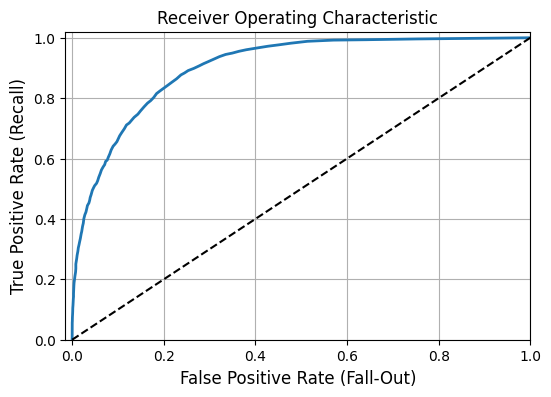

In [ ]:
def plot_roc_curve(tpr, fpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_roc_curve(TPR, FPR)
plt.show()

**Code Check:** Next, compare your plot to the plot generated by Scikit-Learn's `roc_curve` function.  Use Scikit-Learn's `roc_curve` function to calculate the false positive rates, the true positive rates, and the thresholds.  Save the output using sklearn's function as `fpr`, `tpr`, and `thresholds`.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(true_labels, preds)

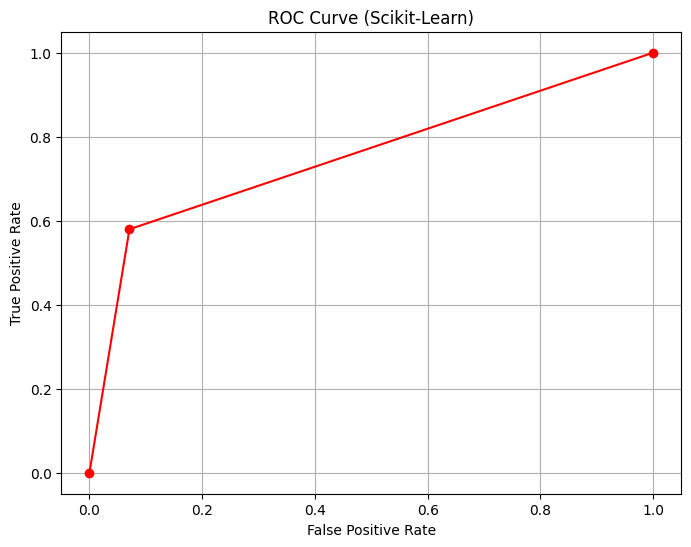

In [ ]:
from sklearn.metrics import roc_curve
roc_curve(true_labels, preds)
fpr, tpr, thresholds  = roc_curve(true_labels, preds)

# Plotting the ROC curve using Scikit-Learn's computed values
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='red')
plt.title('ROC Curve (Scikit-Learn)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [ ]:
# fpr, tpr, thresholds = ### ENTER CODE HERE ###

Pass the false positive rates and the true positive rates obtained above via the Scikit-Learn function as input to the `plot_roc_curve` function in order to compare ROC curves. These two plots should look the same.

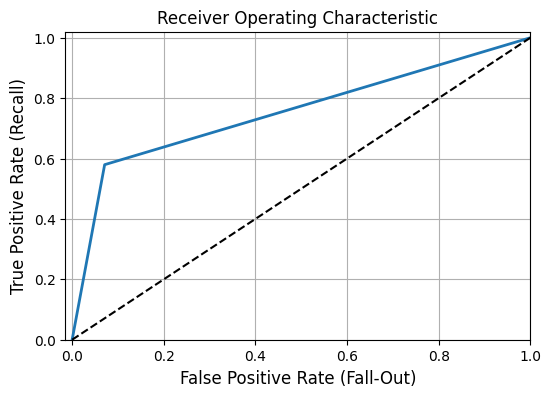

In [ ]:
plt.figure(figsize=(6, 4))
plot_roc_curve(tpr, fpr)
plt.show()